# Can We Improve Our Model Above 99%?

## Data Augmentation

In [32]:
# Import Libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg
import seaborn as sns

from scipy.ndimage.interpolation import shift
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
import time

In [33]:
from sklearn.datasets import fetch_openml

In [34]:
# Import the MNIST Dataset
mnist = fetch_openml('mnist_784', version=1)

In [35]:
# Show the keys in the dataset
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [36]:
# We want to grab the data and the target as X and y, respectively.
X,y = mnist["data"], mnist["target"]

In [37]:
# The MNIST dataset is already split into a training set and test set (first 60,000 images and last 10,000, respectively).
# The training set is already shuffled for us, which guarantees that all cross-validation folds will be similar (we don't want one fold to be missing some digits)

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

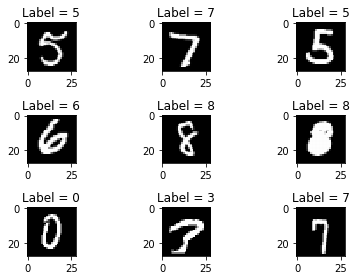

In [38]:
# Let's visualize some of these numbers
for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train.loc[num].array.reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Label = {}".format(y_train[num]))
    
plt.tight_layout()

In [44]:
begin = time.time()
trainX_aug = []
trainY_aug = []

for i in range(len(X_train)):
    for dx, dy in ((1,0), (-1,0), (0,1), (0,-1)):
        image = X_train.loc[i].array
        image = image.reshape(28, 28)
        shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
        shifted_image = shifted_image.reshape([-1])
        trainX_aug.append(shifted_image.round())
        trainY_aug.append(y_train)
    
trainX_aug = pd.DataFrame(trainX_aug).append(X_train, ignore_index = True)
trainY_aug = pd.Series(trainY_aug).append(y_train, ignore_index = True)
end = time.time()
print("Time to run:", end-begin)

/var/folders/yy/c97dzl1137g2yn_zzykcv8th0000gn/T/ipykernel_6491/535192025.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trainX_aug = pd.DataFrame(trainX_aug).append(X_train, ignore_index = True)


: 

: 

In [40]:
trainX_aug

,0,1,2,3,4,5,6,7,8,9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
begin = time.time()
trainX_aug = []
trainY_aug = []

for image, label in zip(np.array(X_train), y_train):
    #shift down
    shift_image = shift(image.reshape((28,28)), [1,0], cval = 0, mode="constant")
    shift_image = shift_image.reshape([-1])
    trainX_aug.append(shift_image.round())
    trainY_aug.append(label)
    #shift up
    shift_image = shift(image.reshape((28,28)), [-1,0], cval = 0, mode="constant")
    shift_image = shift_image.reshape([-1])
    trainX_aug.append(shift_image.round())
    trainY_aug.append(label)
    #shift right
    shift_image = shift(image.reshape((28,28)), [0,1], cval = 0, mode="constant")
    shift_image = shift_image.reshape([-1])
    trainX_aug.append(shift_image.round())
    trainY_aug.append(label)
    #shift left
    shift_image = shift(image.reshape((28,28)), [0,-1], cval = 0, mode="constant")
    shift_image = shift_image.reshape([-1])
    trainX_aug.append(shift_image.round())
    trainY_aug.append(label)
    
trainX_aug = pd.DataFrame(trainX_aug).append(X_train, ignore_index = True)
trainY_aug = pd.Series(trainY_aug).append(y_train, ignore_index = True)
end = time.time()
print("Time to run:", end-begin)

/var/folders/yy/c97dzl1137g2yn_zzykcv8th0000gn/T/ipykernel_6491/2597151993.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trainX_aug = pd.DataFrame(trainX_aug).append(X_train, ignore_index = True)


Time to run: 1720.0325140953064


/var/folders/yy/c97dzl1137g2yn_zzykcv8th0000gn/T/ipykernel_6491/2597151993.py:28: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trainY_aug = pd.Series(trainY_aug).append(y_train, ignore_index = True)


In [11]:
# Check Accuracy on Test Data with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(trainX_aug, trainY_aug)
y_test_hat=knn.predict(X_test) 
test_accuracy=accuracy_score(y_test,y_test_hat)*100
print("Accuracy for our testing dataset with Data Augmentation is : {:.2f}%".format(test_accuracy) )

/Users/gloriahwoang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
plot_confusion_matrix(grid,X_test, y_test,values_format='d' )